<a href="https://colab.research.google.com/github/ire-mide1/Energy_meter_analysis/blob/main/Energy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('ATLAST.csv')
df.head()

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,apparent_power
0,154455,NaN,2021-09-17T13:44:11.565462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,154454,NaN,2021-09-17T13:29:23.225921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,154453,LAG001,2021-09-17T10:23:52.002952,0.44,240.0,50.0,1.0,130.0,NaN,NaN
3,154452,LAG001,2021-09-17T10:23:40.926723,0.44,240.0,50.0,1.0,130.0,NaN,NaN
4,154451,LAG001,2021-09-17T10:23:30.110948,0.44,240.0,50.0,1.0,130.0,NaN,NaN


In [3]:
#calculate apparent power

df['apparent_power'] = df['current']*df['voltage']

#calculate real power

df['real_power'] = df['power_factor']/ df['apparent_power']

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,141331.0,7.396193e+04,43315.771437,2.0,37932.500000,73316.000000,108677.500000,154455.00
current,141309.0,1.830927e+00,4.570310,0.0,0.240000,0.540000,1.610000,75.01
voltage,141309.0,1.785489e+02,45.747509,0.0,159.200000,188.800000,212.380000,317.22
frequency,141309.0,4.970182e+01,4.937397,0.0,50.100000,50.200000,50.300000,61.40
power_factor,141309.0,7.244047e-01,0.268702,0.0,0.600000,0.790000,0.960000,1.00
energy,141309.0,2.521525e+02,14647.647392,0.0,13.479070,73.580390,154.327870,3178480.00
real_power,139412.0,inf,NaN,0.0,0.003065,0.005677,0.013821,inf
apparent_power,141309.0,3.610106e+02,957.091760,0.0,32.620000,117.450000,285.090000,17889.00


In [5]:
#drop nan from the categorical meter_id column and reset index

df.dropna(subset = ["meter_id"], inplace=True)
df.reset_index(drop=True, inplace=True)

#replace inf in real_power with 0
df.replace(to_replace= np.nan, value =0, inplace=True )

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141310 entries, 0 to 141309
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              141310 non-null  int64  
 1   meter_id        141310 non-null  object 
 2   timestamp       141310 non-null  object 
 3   current         141310 non-null  float64
 4   voltage         141310 non-null  float64
 5   frequency       141310 non-null  float64
 6   power_factor    141310 non-null  float64
 7   energy          141310 non-null  float64
 8   real_power      141310 non-null  float64
 9   apparent_power  141310 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 10.8+ MB


In [7]:
#convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'],
                                      format = '%Y-%m-%dT%H:%M:%S',
                                      errors = 'coerce')

In [8]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['week'] = df['timestamp'].dt.week
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second
df['day_of_week'] = df['timestamp'].dt.dayofweek

In [9]:
df

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,apparent_power,year,month,week,day,hour,minute,second,day_of_week
0,154453,LAG001,2021-09-17 10:23:52.002952,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,52,4
1,154452,LAG001,2021-09-17 10:23:40.926723,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,40,4
2,154451,LAG001,2021-09-17 10:23:30.110948,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,30,4
3,154450,LAG001,2021-09-17 10:23:19.423621,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,19,4
4,154449,LAG001,2021-09-17 10:23:08.396163,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141305,6,LAG001,2020-12-13 07:55:50.000000,0.00,230.2,50.3,0.0,0.0,0.00000,0.0,2020,12,50,13,7,55,50,6
141306,5,OND005,2020-12-13 07:46:36.000000,0.00,226.8,49.8,0.0,0.0,0.00000,0.0,2020,12,50,13,7,46,36,6
141307,4,OND005,2020-12-13 07:45:59.000000,0.00,226.7,49.8,0.0,0.0,0.00000,0.0,2020,12,50,13,7,45,59,6
141308,3,OND005,2020-12-13 07:45:21.000000,0.00,229.2,50.3,0.0,0.0,0.00000,0.0,2020,12,50,13,7,45,21,6


In [10]:
#group meterid into common states

di = {'LAG001': 'LAG', 'ADA001': 'ADA', 'OSU001':'OSU', 'OND002':'OND',
 'OND005':'OND', 'OND014':'OND','OSU003':'OSU', 'ADA010':'ADA',
 'ADA009':'ADA', 'ADA008':'ADA', 'ADA007':'ADA', 'ADA005':'ADA',
'ADA004':'ADA', 'ADA003':'ADA', 'ADA002':'ADA', 'OND001':'OND',
 'OND008':'OND', 'OND006':'OND','OND016':'OND', 'OYO003':'OYO',
 'OYO001':'OYO', 'OND007':'OND','OSU002':'OSU', 'OND012':'OND',
'OND018':'OND', 'OND010':'OND', 'OYO002':'OYO',
 'OSN001':'OSN', 'LAG002':'LAG'}

df_grp_states = df.replace({"meter_id": di})
df_grp_states['meter_id'].unique()

array(['LAG', 'ADA', 'OSU', 'OND', 'OYO', 'OSN'], dtype=object)

Text(0.5, 1.0, 'Count of Meter_id with no current')

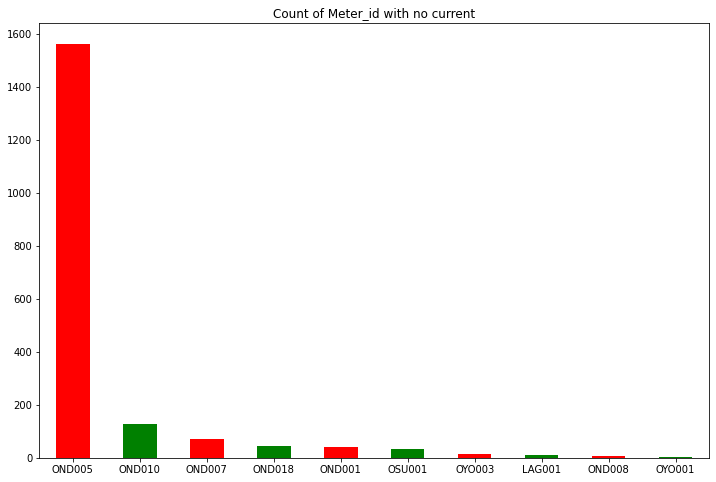

In [11]:
#get the meter_id with zero current

zero_values_df = df[(df[['current']] == 0).all(axis=1)]
zero_values_df['meter_id'].value_counts()

plot_zero_values = zero_values_df['meter_id'].value_counts().plot.bar(color= ("red", "green"), rot =0, figsize =(12,8))
plt.title("Count of Meter_id with no current")

Text(0, 0.5, 'Count of zero voltage')

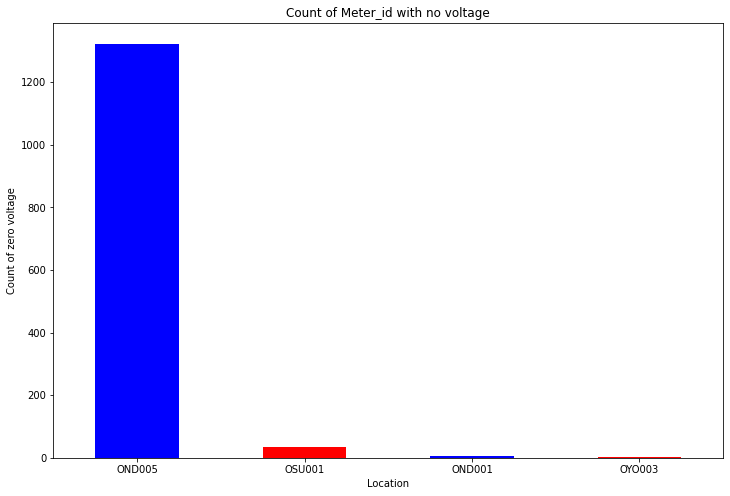

In [12]:
#get the meter_id with zero voltage

zero_values_df2 = df[(df[['voltage']] == 0).all(axis=1)]
zero_values_df2['meter_id'].value_counts()

plot_zero_values = zero_values_df2['meter_id'].value_counts().plot(color= ("blue", "red"), rot =0, figsize =(12,8), kind='bar')
plt.title("Count of Meter_id with no voltage")
plt.xlabel('Location')
plt.ylabel('Count of zero voltage')

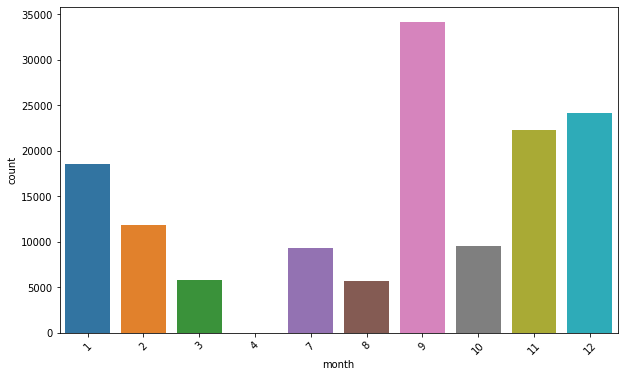

In [13]:
#no data in month 5 and 6 in the 3 years

plt.figure(figsize=(10,6))
df_grp_states['month'].unique() 
sns.countplot(data= df_grp_states, x= 'month')
plt.xticks(rotation= 45)

plt.show()

In [14]:
#there is an outlier in the year;2000 having 4 values

df_grp_states['year'].value_counts().to_frame()

,year
2020,89869
2021,51437
2000,4


In [15]:
print('This data has',df_grp_states['week'].nunique(), 'weeks')

This data has 39 weeks


In [16]:
df_grp_states['week'].value_counts().sort_index()

1      8915
2      5656
3       805
4       694
5      3195
6      4762
7      3700
8       228
9       144
10     1264
11     2626
12     1736
16        2
28     2317
29     5523
30     1571
31     2150
32     1072
33      946
34     1485
35        1
36    11135
37     6682
38    10246
39     6053
40     2253
41     5059
42     2185
43       80
44       64
45     1855
46     7038
47     6662
48     5582
49     1056
50      823
51     6538
52    11546
53     7661
Name: week, dtype: int64

In [17]:
#create a variable to collect each location data

grp = df_grp_states.groupby('meter_id')#group each state by meter_id
grp_lag = grp.get_group('LAG') #collect data for lag
grp_ada = grp.get_group('ADA') #collect data for ada
grp_osu = grp.get_group('OSU') #collect data for osu
grp_ond = grp.get_group('OND') #collect data for ond
grp_oyo = grp.get_group('OYO') ##collect data for oyo
grp_osn = grp.get_group('OSN') #collect data for osn

In [18]:
#create a dataframe of the number of data gotten from eah location
data_count = [[grp_lag['id'].count(), 'Lagos'],[grp_ada['id'].count(), 'Adawama'], [grp_osu['id'].count(), 'Osun'], [grp_ond['id'].count(), 'Ondo'],[grp_oyo['id'].count(), 'Oyo'], [grp_osn['id'].count(), 'Osn'] ]

data_count_df = pd.DataFrame(data_count, columns =['Num_of_data','Cities'])
data_count_df.sort_values(by='Num_of_data')

,Num_of_data,Cities
1,13,Adawama
5,335,Osn
0,491,Lagos
4,9475,Oyo
3,64927,Ondo
2,66069,Osun


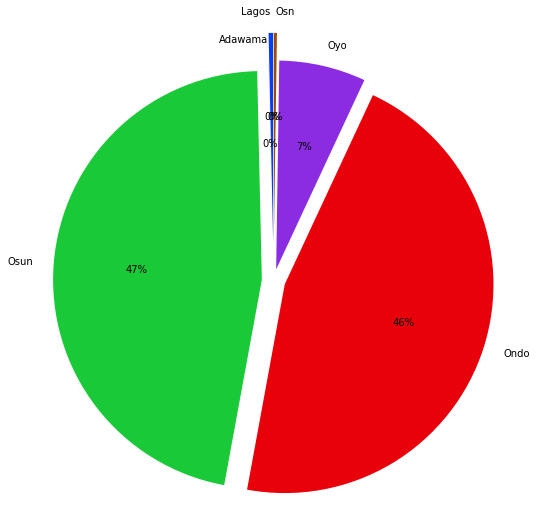

In [19]:
#viz how much data were collected at each location
plt.figure(figsize=(25,6))
explode= [0.3, 0.09, 0.09, 0.09,0.09, 0.3]
labels =['Lagos', 'Adawama', 'Osun', 'Ondo', 'Oyo', 'Osn']
colors = sns.color_palette('bright')
plt.pie(data_count_df['Num_of_data'], labels= labels,
        colors= colors, explode= explode, autopct= '%0.0f%%',
        startangle = 90,wedgeprops={'linewidth':7},
       radius=1.6)

plt.show()

In [20]:
grp_ond = grp_ond[grp_ond.year != 2000]

Text(0, 0.5, 'Apparent Power in VA')

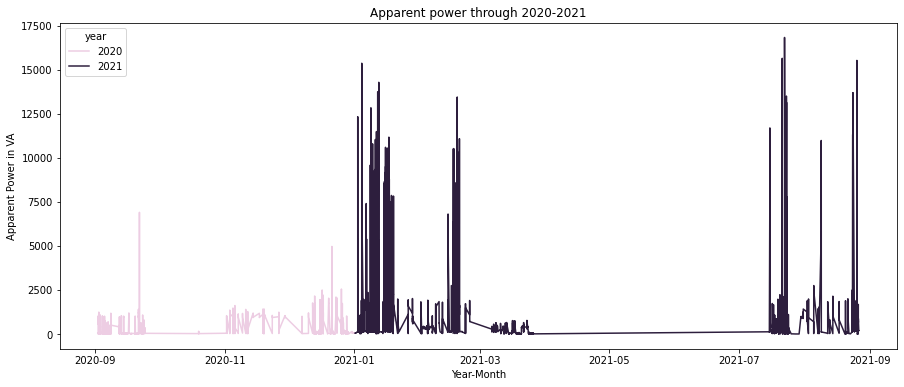

In [21]:
fig, ax = plt.subplots( figsize=(15,6))

palette = sns.color_palette("ch:s= .12, r=.17",2)
sns.lineplot(x= grp_ond['timestamp'], y= grp_ond['apparent_power'], hue = grp_ond['year'], ax=ax, palette= palette)
ax.set_title('Apparent power through 2020-2021')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Apparent Power in VA')

Text(0, 0.5, '')

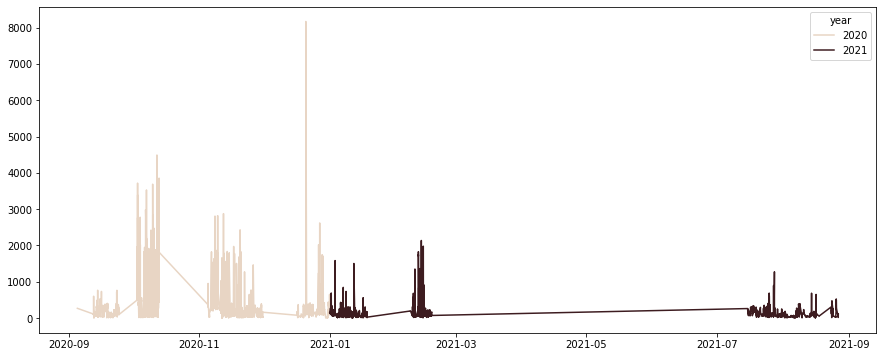

In [22]:
fig, ax = plt.subplots( figsize=(15,6))

palette = sns.color_palette("ch:s= .8, r=.16",2)
sns.lineplot(x= grp_osu['timestamp'], y= grp_osu['apparent_power'], hue = grp_osu['year'], ax=ax, palette= palette)
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')

In [23]:
df_grp_states.head()

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,apparent_power,year,month,week,day,hour,minute,second,day_of_week
0,154453,LAG,2021-09-17 10:23:52.002952,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,52,4
1,154452,LAG,2021-09-17 10:23:40.926723,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,40,4
2,154451,LAG,2021-09-17 10:23:30.110948,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,30,4
3,154450,LAG,2021-09-17 10:23:19.423621,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,19,4
4,154449,LAG,2021-09-17 10:23:08.396163,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,8,4


fig, ax=plt.subplots(figsize=(16,10), dpi=80)
ax.vlines(x=df_grp_states['month'], ymin=0, 
          ymax=df_grp_states['frequency'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df_grp_states['month'], y= df_grp_states['frequency'],
           s= 75, color='firebrick', alpha= 0.7 )

#Annotate
for row in df_grp_states.itertuples():
    ax.text(row.month, row.frequency+5, s= round(row.frequency, 2),
            horizontalalignment= 'center', verticalalignment= 'bottom', fontsize= 6)
    
ax.set_title('Frequency Chart through the months', fontdict={'size':22})    
ax.set_ylabel('Frequency')
ax.set_xticklabels('Months', rotation= 60, fontdict={'horizontalalignment': 'right', 'size':12} )

plt.show()

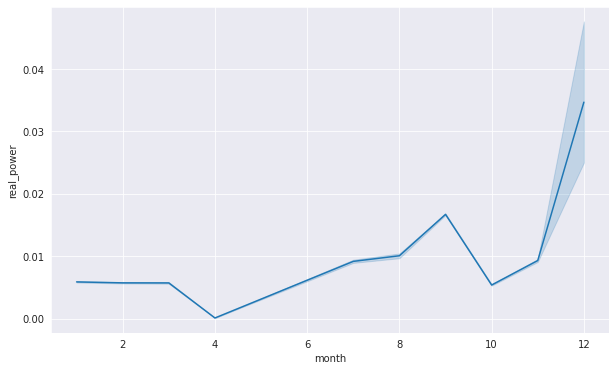

In [24]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.lineplot(data=df_grp_states, x='month', y='real_power')

In [25]:
import datetime as dt

df_grp_states['period'] = (df_grp_states['hour'] % 24 + 4) // 4
df_grp_states['period'].replace({1:'Late Night',
                                 2: 'Early Morning',
                                 3: 'Morning',
                                 4: 'Noon',
                                 5: 'Evening',
                                 6: 'Night'}, inplace= True) 

In [26]:
df_grp_states

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,apparent_power,year,month,week,day,hour,minute,second,day_of_week,period
0,154453,LAG,2021-09-17 10:23:52.002952,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,52,4,Morning
1,154452,LAG,2021-09-17 10:23:40.926723,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,40,4,Morning
2,154451,LAG,2021-09-17 10:23:30.110948,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,30,4,Morning
3,154450,LAG,2021-09-17 10:23:19.423621,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,19,4,Morning
4,154449,LAG,2021-09-17 10:23:08.396163,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,8,4,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141305,6,LAG,2020-12-13 07:55:50.000000,0.00,230.2,50.3,0.0,0.0,0.00000,0.0,2020,12,50,13,7,55,50,6,Early Morning
141306,5,OND,2020-12-13 07:46:36.000000,0.00,226.8,49.8,0.0,0.0,0.00000,0.0,2020,12,50,13,7,46,36,6,Early Morning
141307,4,OND,2020-12-13 07:45:59.000000,0.00,226.7,49.8,0.0,0.0,0.00000,0.0,2020,12,50,13,7,45,59,6,Early Morning
141308,3,OND,2020-12-13 07:45:21.000000,0.00,229.2,50.3,0.0,0.0,0.00000,0.0,2020,12,50,13,7,45,21,6,Early Morning


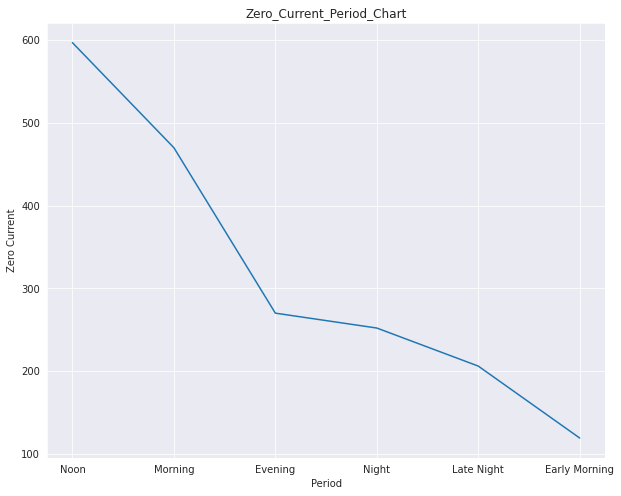

In [27]:
zero_current = df_grp_states[(df_grp_states[['current']] == 0).all(axis=1)]
zero_current['period'].value_counts().plot(kind='line',figsize=(10,8), xlabel='Period',
                                           ylabel='Zero Current', title='Zero_Current_Period_Chart')

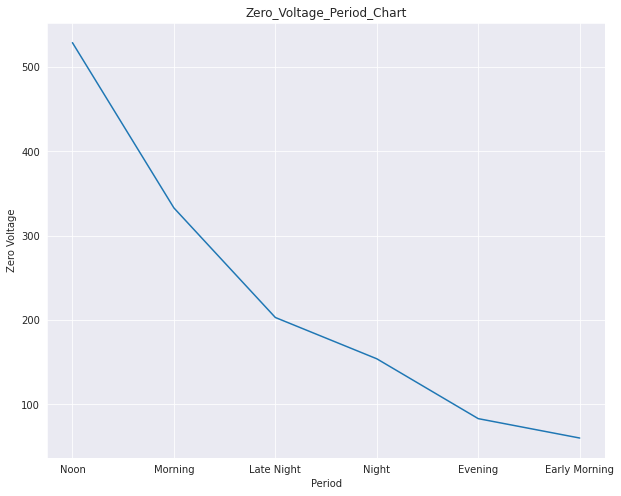

In [28]:
zero_voltage = df_grp_states[(df_grp_states[['voltage']] == 0).all(axis=1)]
zero_voltage['period'].value_counts().plot(kind='line',figsize=(10,8), xlabel='Period',
                                           ylabel='Zero Voltage', title='Zero_Voltage_Period_Chart')

In [ ]:
#mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen']      
plt.figure(figsize=(16,10))

for i, y in enumerate(df_grp_states['year']):
    plt.plot('month', 'real_power', data=df_grp_states.loc[df_grp_states.year==y, :],label=y)
    #plt.text(df_grp_states.loc[df_grp_states.year==y, :].shape[0]-.9, df_grp_states.loc[df_grp_states.year==y, 'real_power'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration

In [ ]:
# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="current", y="voltage", hue="period", data=df_grp_states, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 3.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit for Current flow against Voltage", fontsize=20)
plt.show()